# Verificação da desigualdade CHSH com Qiskit runtime

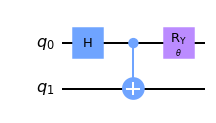

In [1]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

theta = Parameter('$\\theta$')

chsh_circuits_no_meas = QuantumCircuit(2)
chsh_circuits_no_meas.h(0)
chsh_circuits_no_meas.cx(0, 1)
chsh_circuits_no_meas.ry(theta, 0)
chsh_circuits_no_meas.draw('mpl')

In [3]:
import numpy as np

number_of_phases = 21
phases = np.linspace(0, 2*np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]
individual_phases

[[0.0],
 [0.3141592653589793],
 [0.6283185307179586],
 [0.9424777960769379],
 [1.2566370614359172],
 [1.5707963267948966],
 [1.8849555921538759],
 [2.199114857512855],
 [2.5132741228718345],
 [2.827433388230814],
 [3.141592653589793],
 [3.4557519189487724],
 [3.7699111843077517],
 [4.084070449666731],
 [4.39822971502571],
 [4.71238898038469],
 [5.026548245743669],
 [5.340707511102648],
 [5.654866776461628],
 [5.969026041820607],
 [6.283185307179586]]

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = "ibmq_qasm_simulator"

In [6]:
from qiskit_ibm_runtime import Estimator, Session
from qiskit.quantum_info import SparsePauliOp

ZZ = SparsePauliOp.from_list([("ZZ", 1)])
ZX = SparsePauliOp.from_list([("ZX", 1)])
XZ = SparsePauliOp.from_list([("XZ", 1)])
XX = SparsePauliOp.from_list([("XX", 1)])

ops = [ZZ, ZX, XZ, XX]
chsh_est_sim = []

# Simulator
with Session(service=service, backend=backend):
    estimator = Estimator()
    for op in ops:
        job = estimator.run(
            circuits=[chsh_circuits_no_meas]*len(individual_phases),
            observables=[op]*len(individual_phases),
            parameter_values=individual_phases)
        est_result = job.result()
        chsh_est_sim.append(est_result)

runtime_job._start_websocket_client:WARNING:2022-11-20 14:09:25,002: An error occurred while streaming results from the server for job cdt5uboflvpqtua0joc0:
Traceback (most recent call last):
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'

runtime_job._start_websocket_client:WARNING:2022-11-20 14:09:47,449: An error occurred while streaming results from the ser

In [7]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab>
chsh1_est_sim = chsh_est_sim[0].values - chsh_est_sim[1].values + chsh_est_sim[2].values + chsh_est_sim[3].values

# <CHSH2> = <AB> + <Ab> - <aB> + <ab>
chsh2_est_sim = chsh_est_sim[0].values + chsh_est_sim[1].values - chsh_est_sim[2].values + chsh_est_sim[3].values

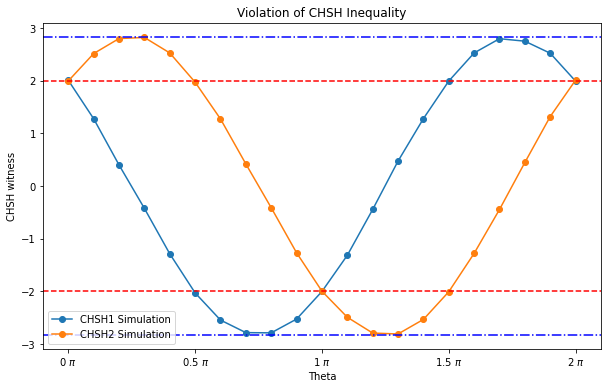

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, ax = plt.subplots(figsize=(10, 6))
# results from a simulator
ax.plot(phases/np.pi, chsh1_est_sim, 'o-', label='CHSH1 Simulation')
ax.plot(phases/np.pi, chsh2_est_sim, 'o-', label='CHSH2 Simulation')
# classical bound +-2
ax.axhline(y=2, color='r', linestyle='--')
ax.axhline(y=-2, color='r', linestyle='--')
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title('Violation of CHSH Inequality')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend()

In [ ]:
from qiskit_ibm_runtime import Estimator, Session
from qiskit.quantum_info import SparsePauliOp
backend = service.get_backend("ibmq_belem")

ZZ = SparsePauliOp.from_list([("ZZ", 1)])
ZX = SparsePauliOp.from_list([("ZX", 1)])
XZ = SparsePauliOp.from_list([("XZ", 1)])
XX = SparsePauliOp.from_list([("XX", 1)])

ops = [ZZ, ZX, XZ, XX]
chsh_est_sim = []

with Session(service=service, backend=backend):
    estimator = Estimator()
    for op in ops:
        job = estimator.run(
            circuits=[chsh_circuits_no_meas]*len(individual_phases),
            observables=[op]*len(individual_phases),
            parameter_values=individual_phases)
        print(job.job_id())
        est_result = job.result()
        chsh_est_sim.append(est_result)

cdtnb7tobt6plnrnrsmg


In [9]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab>
chsh1_est_sim = chsh_est_sim[0].values - chsh_est_sim[1].values + chsh_est_sim[2].values + chsh_est_sim[3].values

# <CHSH2> = <AB> + <Ab> - <aB> + <ab>
chsh2_est_sim = chsh_est_sim[0].values + chsh_est_sim[1].values - chsh_est_sim[2].values + chsh_est_sim[3].values

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, ax = plt.subplots(figsize=(10, 6))
# results from a simulator
ax.plot(phases/np.pi, chsh1_est_sim, 'o-', label='CHSH1 Experiment')
ax.plot(phases/np.pi, chsh2_est_sim, 'o-', label='CHSH2 Experiment')
# classical bound +-2
ax.axhline(y=2, color='r', linestyle='--')
ax.axhline(y=-2, color='r', linestyle='--')
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title('Violation of CHSH Inequality')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend()

IBMRuntimeError: 'Failed to run program: "HTTPSConnectionPool(host=\'runtime-us-east.quantum-computing.ibm.com\', port=443): Read timed out. (read timeout=None)"'

In [2]:
(250/4)*3

187.5